## Demonstration with Breast Cancer Wisconsin Data

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
# Get the data and its  label from the dataframe
x = df.loc[:, 2:].values
_y = df.loc[:, 1].values
# Peek the data
x.shape, _y.shape, x[:1], _y[:30]

((569, 30),
 (569,),
 array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
           1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
           3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
           7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
           8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
           4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
           3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
           1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
           1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
           2.65400000e-01,   4.60100000e-01,   1.18900000e-01]]),
 array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M'], dtype=object))

In [4]:
# See stats all the features
stats = np.vstack(( np.min(x, 0), np.max(x, 0), np.mean(x, 0), np.std(x, 0)))
df_stats = pd.DataFrame(stats)
df_stats.rename({0: "Min", 1: "Max", 2: "Mean", 3: "Std"})

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
Max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
Mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
Std,3.520951,4.297255,24.277619,351.604754,0.014052,0.052766,0.079650,0.038769,0.027390,0.007054,...,4.828993,6.140854,33.573002,568.856459,0.022812,0.157198,0.208441,0.065675,0.061813,0.018045


(212, 357)


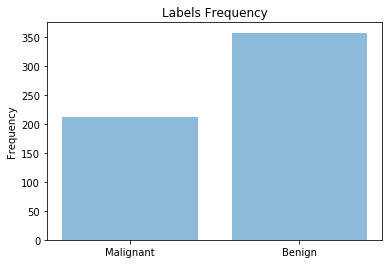

In [5]:
# See the labels stats
classes = ('Malignant', 'Benign')
y_pos = np.arange(len(classes))
n_M = len(np.where(_y == 'M')[0])
n_B = len(np.where(_y == 'B')[0])
print (n_M, n_B)
plt.bar(y_pos, [n_M, n_B], align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Frequency')
plt.title('Labels Frequency')
plt.show()

### Data Transformation

In [6]:
# Normalize x
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)
# See stats all the features
stats_normalized = np.vstack(( np.min(x, 0), np.max(x, 0), np.mean(x, 0), np.std(x, 0)))
df_stats_normalized = pd.DataFrame(stats_normalized)
df_stats_normalized.rename({0: "Min", 1: "Max", 2: "Mean", 3: "Std"})

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
Max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00
Mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,1.748260e-16,1.998011e-16,3.746271e-17,-3.746271e-17,1.873136e-16,4.526744e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.747265e-16,2.122887e-16
Std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Transform the training label
# M (Malignant) = 1 and B (Benign) = 0
y = np.zeros(_y.shape[0], dtype=int)
y[_y=='M'] = 1
y[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1])

In [8]:
# Divide the data
# Training 70%, Test 30%
n = int(0.7 * x.shape[0])
x_train, y_train = x[:n], y[:n]
x_test, y_test = x[n:], y[n:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

### Logistic Regression at Play

In [9]:
from log_regression import LogisticRegression

In [10]:
# Training with alpha = 0.001
classifier = LogisticRegression(0.01)
classifier.fit(x_train, y_train, 50000)
acc, conf = classifier.evaluate(x_train, y_train, verbose=True)

Accuracy: 0.982412060302
Confusion matrix: 
 [[ 223.    2.]
 [   5.  168.]]


In [11]:
# See the score for test data
acc, conf = classifier.evaluate(x_test, y_test, verbose=True)

Accuracy: 0.970760233918
Confusion matrix: 
 [[ 127.    5.]
 [   0.   39.]]


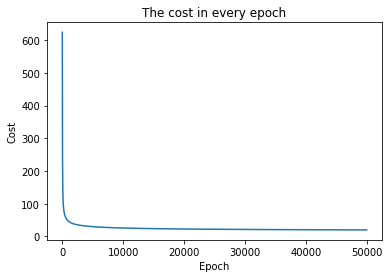

In [12]:
# See the cost log graph
x = np.arange(len(classifier.cost_log)) + 1
plt.plot(x, classifier.cost_log)
plt.title('The cost in every epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()